# W-net Test

In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import glob
import sys
import random
import time
import scipy
from keras.optimizers import Adam
import sys
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import frequency_spatial_network as fsnet  

In [4]:
under_rate = '20'

stats = np.load("../Data/stats_fs_unet_norm_" + under_rate + ".npy")
var_sampling_mask = np.load("../Data/sampling_mask_" + under_rate + "perc.npy")

model = fsnet.wnet(stats[0],stats[1],stats[2],stats[3],\
                                   kshape = (5,5),kshape2=(3,3))

opt = Adam()
model.compile(loss = [fsnet.nrmse,fsnet.nrmse],optimizer=opt, loss_weights=[0.01, 0.99])

model_name = "../Models/wnet_" + under_rate + ".hdf5"
model.load_weights(model_name)

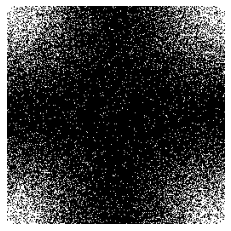

D:\Dataset\calgary\Test\Test\e14736s3_P55296_hybrid.npy
20


In [12]:
fig = plt.figure()
plt.imshow(~var_sampling_mask, cmap = "gray")
plt.axis("off")
plt.show()

out_path = "..\Recs"
# Test Set 
test_path = "D:\Dataset\calgary\Test\Test\*.npy"
kspace_files = np.asarray(glob.glob(test_path))
print(kspace_files[-1])
print(len(kspace_files))

6/6 [==============================] - 143s 23s/step


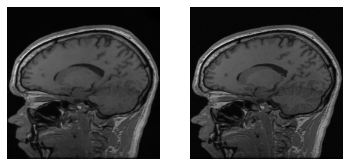

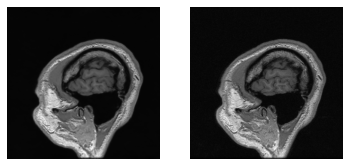

6/6 [==============================] - 138s 22s/step


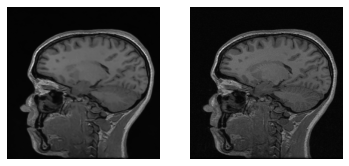

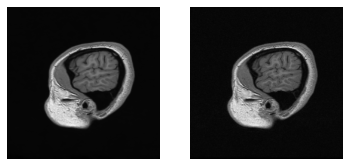

6/6 [==============================] - 138s 22s/step


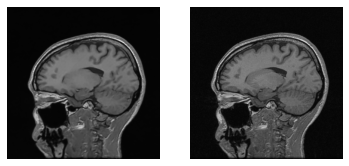

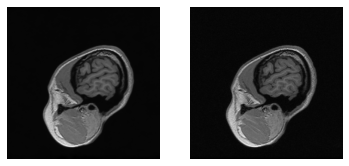

6/6 [==============================] - 134s 22s/step


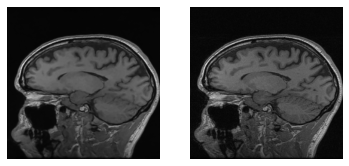

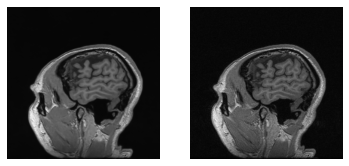

6/6 [==============================] - 127s 21s/step


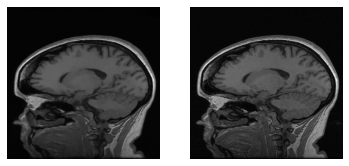

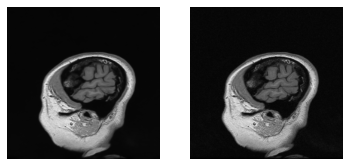

6/6 [==============================] - 143s 24s/step


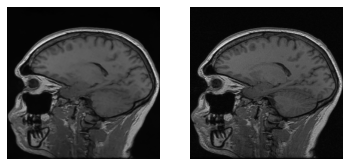

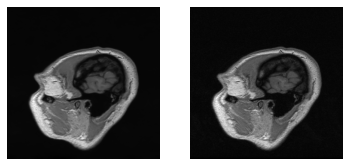

6/6 [==============================] - 157s 26s/step


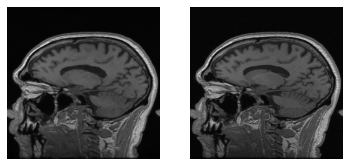

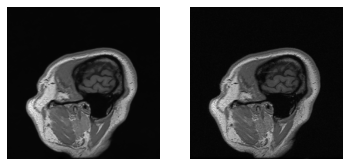

6/6 [==============================] - 136s 22s/step


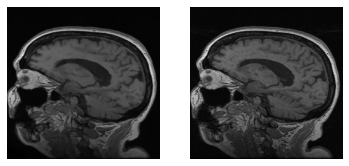

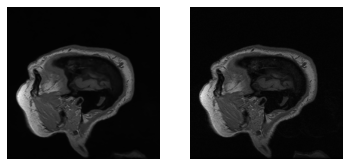

6/6 [==============================] - 131s 21s/step


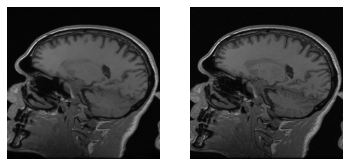

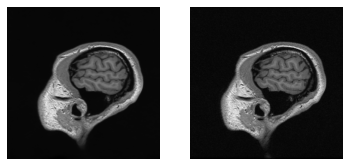

6/6 [==============================] - 138s 23s/step


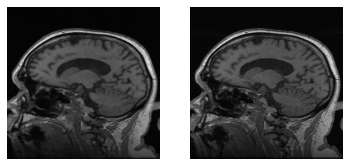

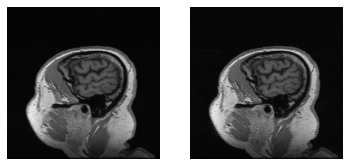

In [6]:
imshape = (256,256)
norm = np.sqrt(imshape[0]*imshape[1])

for jj in range(len(kspace_files)):
    kspace = np.load(kspace_files[jj])/norm
    kspace2 = kspace.copy()
    kspace[:,var_sampling_mask,:] = 0
    kspace = (kspace-stats[0])/stats[1]
    rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
    pred = model.predict(kspace)[1].astype(np.float64)
    name = kspace_files[jj].split("/")[-1].split(".")[0] + "_hybrid.npy"
    np.save(os.path.join(out_path,name),pred[:,:,:,0]*norm)
    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(pred[100,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(rec[100], cmap = "gray")
    plt.axis("off")
    plt.show()
    
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(pred[25,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.subplot(122)
    plt.imshow(rec[25], cmap = "gray")
    plt.axis("off")
    plt.show()

In [11]:
jj = 5
kspace = np.load(kspace_files[jj])/norm
kspace2 = kspace.copy()
kspace[:,var_sampling_mask,:] = 0
kspace = (kspace-stats[0])/stats[1]
rec = np.abs(np.fft.ifft2(kspace2[:,:,:,0]+1j*kspace2[:,:,:,1])).astype(np.float64)
rec.shape

(170, 256, 256)